# Life Expectancy Analysis

In [1]:
# Dependencies and setup

import pandas as pd
import requests
import matplotlib.pyplot as plt

### Life Expectancy Dataset loaded and cleaned

In [2]:
Life_Exp_Male_df = pd.read_csv('Resources/WHO Life Expectancy Male.csv')
Life_Exp_Female_df = pd.read_csv('Resources/WHO Life Expectancy Female.csv')

# Rows with little or no data were removed from CSV file, easier to do in Excel. 

# Columns need to be converted to row data
Life_Exp_Male_df = pd.melt(Life_Exp_Male_df, id_vars = 'Country', var_name = 'Year', value_name = 'Life Expectancy Male')
Life_Exp_Female_df = pd.melt(Life_Exp_Female_df, id_vars = 'Country', var_name = 'Year', value_name = 'Life Expectancy Female')

# Merge Male / Female Data 
Life_Exp_df = pd.merge(Life_Exp_Male_df, Life_Exp_Female_df, on = ['Country', 'Year'])

# Reduce decimal places to 1
Life_Exp_df['Life Expectancy Male'] = Life_Exp_df['Life Expectancy Male'].round(1)
Life_Exp_df['Life Expectancy Female'] = Life_Exp_df['Life Expectancy Female'].round(1)

# Change any NaN values to ""
Life_Exp_df.fillna('', inplace = True)

Life_Exp_df

,Country,Year,Life Expectancy Male,Life Expectancy Female
0,Aruba,1960,60.6,67.8
1,Africa Eastern and Southern,1960,42.5,45.7
2,Afghanistan,1960,31.9,33.3
3,Africa Western and Central,1960,36.4,39.4
4,Angola,1960,36.6,39.9
...,...,...,...,...
16060,Kosovo,2022,,
16061,"Yemen, Rep.",2022,,
16062,South Africa,2022,,
16063,Zambia,2022,,


### Population Dataset loaded and cleaned

In [3]:
Population_df = pd.read_csv('Resources/WHO Population.csv')

# Columns need to be converted to row data
Population_df = pd.melt(Population_df, id_vars = 'Country', var_name = 'Year', value_name = 'Population')

# Merge Population with Main dataset
Life_Exp_df = pd.merge(Life_Exp_df, Population_df, on = ['Country', 'Year'])

Life_Exp_df

,Country,Year,Life Expectancy Male,Life Expectancy Female,Population
0,Aruba,1960,60.6,67.8,54608
1,Africa Eastern and Southern,1960,42.5,45.7,130692579
2,Afghanistan,1960,31.9,33.3,8622466
3,Africa Western and Central,1960,36.4,39.4,97256290
4,Angola,1960,36.6,39.9,5357195
...,...,...,...,...,...
16060,Kosovo,2022,,,1761985
16061,"Yemen, Rep.",2022,,,33696614
16062,South Africa,2022,,,59893885
16063,Zambia,2022,,,20017675


In [4]:
# How many countries in dataset?
Life_Exp_df['Country'].nunique()

255

### GDP Dataset loaded and cleaned

In [5]:
GDP_df = pd.read_csv('Resources/WHO GDP.csv')

# Columns need to be converted to row data
GDP_df = pd.melt(GDP_df, id_vars = 'Country', var_name = 'Year', value_name = 'GDP')

# Change any NaN values to ""
GDP_df.fillna('', inplace = True)

Display_df = pd.DataFrame(GDP_df)
pd.set_option('display.float_format', '{:,.0f}'.format)

GDP_df

,Country,Year,GDP
0,Aruba,1960,
1,Africa Eastern and Southern,1960,"21,125,015,452"
2,Africa Western and Central,1960,"10,447,637,853"
3,Angola,1960,
4,Albania,1960,
...,...,...,...
14485,Samoa,2022,"832,421,565"
14486,"Yemen, Rep.",2022,
14487,South Africa,2022,"405,870,000,000"
14488,Zambia,2022,"29,784,454,056"


In [6]:
# How many countries in dataset?
GDP_df['Country'].nunique()

230

### OECD GDP Growth Dataset loaded and cleaned

In [7]:
# Load data into dataframe
GDP_Growth_df = pd.read_csv('Resources/OECD GDP Growth Data.csv')

In [13]:
# Removing rows where '1980' column has the value "no data"
GDP_Growth_df = GDP_Growth_df[(GDP_Growth_df['2000'] != 'no data') & (~GDP_Growth_df['2000'].isna())]

# Remove columns outside of 2000 - 2015
GDP_Growth_df = GDP_Growth_df[['Country', '2000', '2001', '2002', '2003', '2004', '2005', '2006','2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]

In [ ]:
# Reshape the GDP_Growth_df so that years are listed in rows instead of columns

GDP_Growth_df_melted = pd.melt(GDP_Growth_df, id_vars = 'Country', var_name = 'Year', value_name = 'GDP Growth %')

# Convert the 'Year' column to integers
GDP_Growth_df_melted['Year'] = GDP_Growth_df_melted['Year'].astype(int)

GDP_Growth_df_melted.head()

,Country,Year,GDP Growth %
0,Albania,2000,6.9
1,Algeria,2000,3.8
2,Angola,2000,3.1
3,Antigua and Barbuda,2000,6.2
4,Argentina,2000,-0.8


In [ ]:
# How many countries in dataset?
GDP_Growth_df_melted['Country'].nunique()

216

### Line Chart showing life expectancy over time

In [14]:

# Grouping by 'Year' and 'Status' and calculating average life expectancy
m_grouped_df = Life_Exp_df.groupby(['Year'])['Life Expectancy Male'].mean().reset_index()
f_grouped_df = Life_Exp_df.groupby(['Year'])['Life Expectancy Female'].mean().reset_index()

# Creating the line chart
plt.figure(figsize =(10, 6))  

# Line plot for Males
plt.plot(m_grouped_df['Year'], m_grouped_df['Life Expectancy'], label='males', marker='o')

# Line plot for Females
plt.plot(f_grouped_df['Year'], f_grouped_df['Life Expectancy'], label='females', marker='o')

plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy by Year and Sex')
plt.ylim(0, 100)
plt.legend()
plt.xticks(rotation=45) 

plt.show()

TypeError: unsupported operand type(s) for +: 'float' and 'str'

### Scatter Plot showing Life Expectancy vs. Population

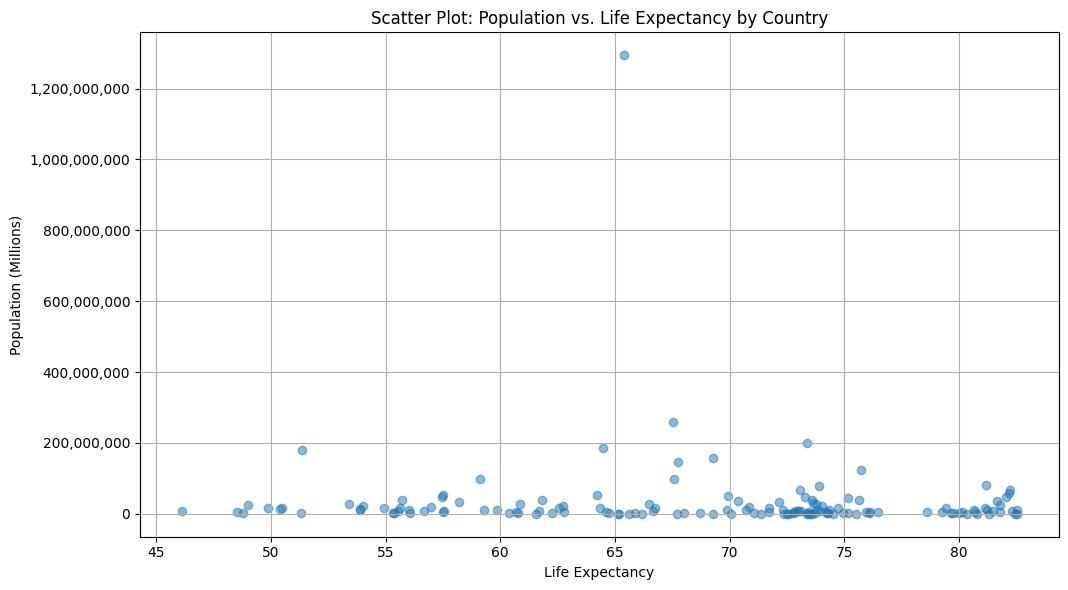

In [ ]:
# Group by 'Country' and calculate the average 'Life Expectancy' and total 'Population'
grouped_df = Life_Exp_df.groupby('Country').agg({
    'Life Expectancy': 'mean',
    'Population': 'max'
}).reset_index()

# Reverse the x and y-axis data
x = grouped_df['Life Expectancy']
y = grouped_df['Population']

# Convert population values to millions for labeling
y_labels_millions = [val / 1000000 for val in y]

plt.figure(figsize=(10, 6))  # Adjust the size of the plot as needed.
plt.scatter(x, y, alpha=0.5)  # 'alpha' controls the transparency of the points.

plt.xlabel('Life Expectancy')
plt.ylabel('Population (Millions)')  # Label the y-axis with population in millions
plt.title('Scatter Plot: Population vs. Life Expectancy by Country')

plt.grid(True)  # Add a grid to the plot.
plt.tight_layout()  # Improve spacing between elements.

# Format y-axis labels to display population in millions
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()  # Display the plot.

In [ ]:
Outliers_df = grouped_df[Life_Exp_df['Population'] > 40000000]
Outliers_df

/var/folders/ds/jk39g9xd62v_5kxdlxcxn0800000gn/T/ipykernel_1723/2606399926.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Outliers_df = grouped_df[Life_Exp_df['Population'] > 40000000]


,Country,Life Expectancy,Population
80,Ireland,80.1500,4676835.0
81,Israel,81.3000,82157.0
82,Italy,82.1875,59539717.0
84,Japan,82.5375,127854.0
85,Jordan,72.9875,8413464.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming you have a DataFrame named 'Life_Exp_Report_df' with columns 'Country', 'BMI', and 'Life Expectancy'

# Calculate average BMI and Life Expectancy grouped by 'Country'
avg_data = Life_Exp_Report_df.groupby('Country').mean([['BMI', 'Life Expectancy']])

x_avg = avg_data['BMI']
y_avg = avg_data['Life Expectancy']

plt.figure(figsize=(10, 6))  
plt.scatter(x_avg, y_avg, alpha=0.5)  

plt.xlabel('BMI')
plt.ylabel('Life Expectancy')
plt.title('Scatter Plot: Average BMI vs. Average Life Expectancy by Country')

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_avg, y_avg)

# Create the linear regression line using the calculated slope and intercept
regression_line = slope * x_avg + intercept

# Plot the linear regression line
plt.plot(x_avg, regression_line, color='red', linewidth=2)

plt.grid(True)
plt.tight_layout()

# Format y-axis labels to display population in millions (if needed)
# plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()